<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/Monkey%26Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

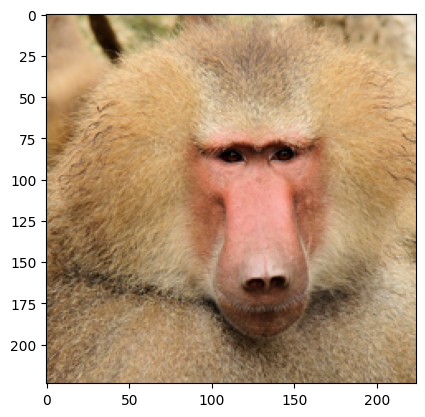

1/1 [==============================] - 1s 900ms/step
Class: Monkey Face
Confidence Score: 0.99974364


In [44]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import matplotlib.pyplot as plt
import numpy as np

# 소수점 표현법 변경
np.set_printoptions(suppress=True)

# model 불러오기
model = load_model("/content/keras_model.h5", compile=False) # CNN

# labels 불러오기
class_names = open("/content/labels.txt", "r").readlines()

# 전처리
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# 이미지를 열고 RGB 형태로 변환함
image = Image.open("/content/MonkeyImage.jpg").convert("RGB")

# Image를 224x244로 리사이징하고, Image를 중앙에서부터 자른다
size = (224, 224)
image = ImageOps.fit(image, size, Image.LANCZOS)
plt.imshow(image)
plt.show()

# Image를 Numpy array로 변환
image_array = np.asarray(image)

# 이미지 정규화
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# 정규화 된 이미지를 배열 Index 0번에 넣기
data[0] = normalized_image_array

# model predict
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# predict 결과 출력
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
